# Trabajo Final - Curso Introductorio a Python
## Movimiento de un robot paralelo accionado por cuatro cables

-  **Nombre:** Xavier Ivan Aguas Haro
-  **email:** xavieraguas03@gmail.com

<div style="text-align: justify">  
    Los robots accionados por cables son una clase especial de robots paralelos, los cuales están formados al reemplazar los enlaces rígidos por cables. Gracias a las características físicas que otorgan los cables como baja inercia y mayor rango de movimiento en comparación con las articulaciones esféricas, les permite ser excelentes candidatos para realizar una amplia gama de aplicaciones porque poseen ventajas como: manipulación de objetos a alta velocidad, carga útil alta, bajo costo de instalación y mantenimiento.
</div>  
    
<img src="RobotCables.png" alt="drawing" style="width:500px;"/>    


Consta de 3 elementos importantes:

* Espacio de trabajo o base
* Actuadores o motores
* Efector final


Para realizar este estudio se utilizo los siguientes requerimientos
- Python 3.7
- Pandas *(Latest Version)*
- Numpy *(Latest Version)*


### Objetivo:

Identificar el movimiento del robot accionado por cuatro cables en el plano xy. Dibujar el desempeño en el **eje x** y **eje y**. Además mostrar el error en función del tiempo a través del **índice del error cuadratico**. Realizar el procedimiento anterior para dos figuras. 

> Importar librerias

In [25]:
import pandas as pd
import numpy as np

> Leer CSV de la figura 1 y empezar con el procedimiento

In [30]:
square_figure = pd.read_csv("cddr_square.csv")

In [31]:
flower_figure = pd.read_csv("cddr_flower.csv")

In [32]:
print(square_figure)

     time     Xrefs     Yrefs   Xrobots   Yrobots         ISExs         ISEys
0     0.0  0.000000  0.000000  0.000186  0.000013  0.000000e+00  0.000000e+00
1     0.1  0.000937  0.000937  0.000117  0.000646  2.930000e-08  2.930000e-08
2     0.2  0.001875  0.001875  0.000877  0.001282  3.480000e-08  3.480000e-08
3     0.3  0.002812  0.002812  0.002863  0.001889  6.160000e-08  6.160000e-08
4     0.4  0.003750  0.003750  0.003828  0.003117  9.180000e-08  9.180000e-08
..    ...       ...       ...       ...       ...           ...           ...
396  39.6  0.075000  0.067500  0.075024  0.065795  3.000000e-05  2.940000e-05
397  39.7  0.075000  0.069375  0.075110  0.067680  3.000000e-05  2.950000e-05
398  39.8  0.075000  0.071250  0.075566  0.069924  3.000000e-05  2.970000e-05
399  39.9  0.075000  0.073125  0.074525  0.071730  3.000000e-05  2.990000e-05
400  40.0  0.075000  0.075000  0.074168  0.074029  3.000000e-05  3.000000e-05

[401 rows x 7 columns]


In [33]:
print(flower_figure)

     time     Xrefc     Yrefc   Xrobotc   Yrobotc         ISExc         ISEyc
0     0.0  0.000000  0.000000  0.000186  0.000013  0.000000e+00  0.000000e+00
1     0.1  0.003299  0.000041  0.001845 -0.000024  3.630000e-07  2.750000e-11
2     0.2  0.006595  0.000165  0.004483 -0.000048  4.310000e-07  3.730000e-10
3     0.3  0.009884  0.000371  0.008634 -0.000143  7.610000e-07  1.350000e-09
4     0.4  0.013162  0.000659  0.011826  0.000434  1.130000e-06  3.500000e-09
..    ...       ...       ...       ...       ...           ...           ...
496  49.6 -0.021784  0.001816 -0.023353  0.002511  7.530000e-05  7.920000e-05
497  49.7 -0.018552  0.001314 -0.020347  0.001383  7.570000e-05  7.920000e-05
498  49.8 -0.015300  0.000891 -0.017936  0.001404  7.620000e-05  7.920000e-05
499  49.9 -0.012032  0.000550 -0.014874  0.000550  7.660000e-05  7.920000e-05
500  50.0 -0.008750  0.000290 -0.010713  0.000186  7.710000e-05  7.920000e-05

[501 rows x 7 columns]


In [37]:
# Imprimir valores de la columna 1 para verificar comando
print(square_figure['time'])


0       0.0
1       0.1
2       0.2
3       0.3
4       0.4
       ... 
396    39.6
397    39.7
398    39.8
399    39.9
400    40.0
Name: time, Length: 401, dtype: float64


In [44]:
# Imprimir valores de la columna 2 para verificar comando
print(square_figure['Xrefs'])

0      0.000000
1      0.000937
2      0.001875
3      0.002812
4      0.003750
         ...   
396    0.075000
397    0.075000
398    0.075000
399    0.075000
400    0.075000
Name: Xrefs, Length: 401, dtype: float64


In [45]:
# Importar libreria matplotlib para realizar graficos
import matplotlib.pyplot as plt

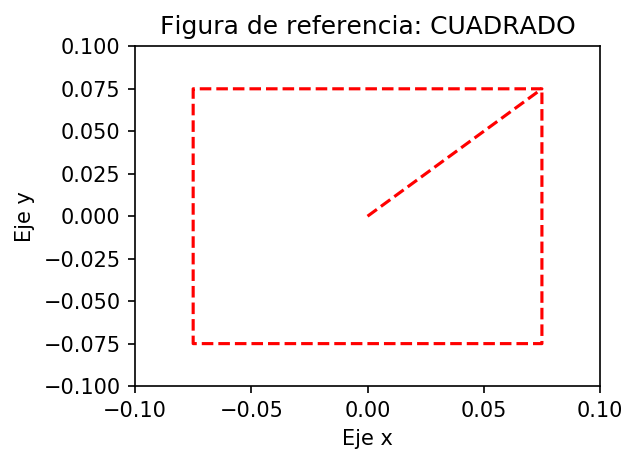

In [85]:
# Figura 1: Mostrar la figura en el plano x y
plt.rcParams["figure.figsize"]= (4,3)
plt.rcParams["figure.dpi"] = 150

xr1 = square_figure['Xrefs'];
yr1 = square_figure['Yrefs'];

plt.plot(xr1, yr1, color='red', linestyle='--')
plt.title(' Figura de referencia: CUADRADO ')
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.show()


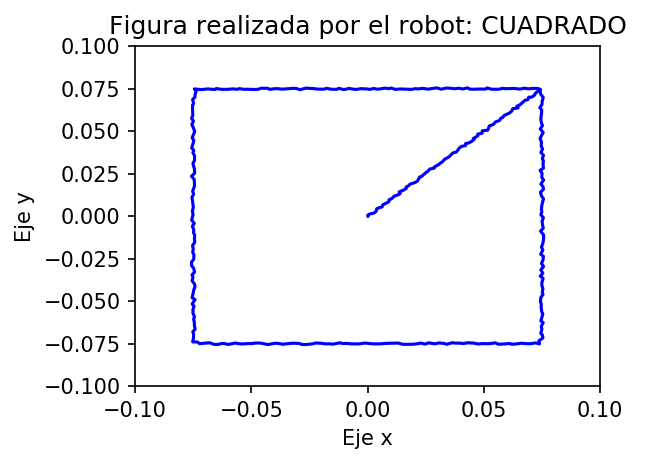

In [86]:
# Figura 2: Mostrar la figura en el plano x y del robot

xrobot1 = square_figure['Xrobots'];
yrobot1 = square_figure['Yrobots'];

plt.plot(xrobot1, yrobot1, color='blue', linestyle='-')
plt.title(' Figura realizada por el robot: CUADRADO ')
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.show()


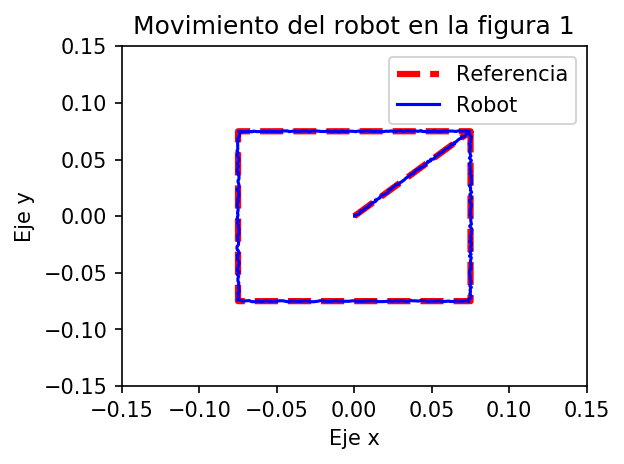

In [87]:
plt.plot(xr1, yr1, color='red', label='Referencia', linestyle='--', linewidth=3.0)
plt.plot(xrobot1, yrobot1, color='blue', label='Robot',linestyle='-')
plt.title('Movimiento del robot en la figura 1')
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.legend(["Referencia","Robot"])
plt.savefig('Figura1 Robot.png')
plt.show()


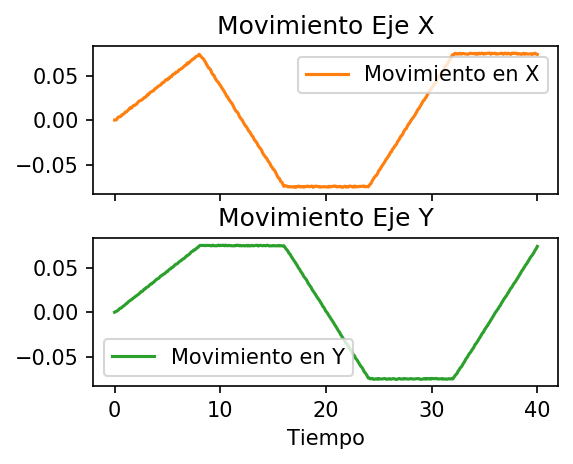

In [94]:
# Movimiento en el "eje x" y "eje y"

time = square_figure['time'];
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.3})

axs[0].set_title('Movimiento Eje X')
axs[1].set_title('Movimiento Eje Y')
axs[0].plot(time, xrobot1, 'tab:orange', label="Movimiento en X")
axs[1].plot(time, yrobot1, 'tab:green', label="Movimiento en Y")
axs[0].legend(["Movimiento en X"])
axs[1].legend(["Movimiento en Y"])
plt.xlabel("Tiempo")
plt.savefig('Figura1 MovimientoXY.png')
plt.show()


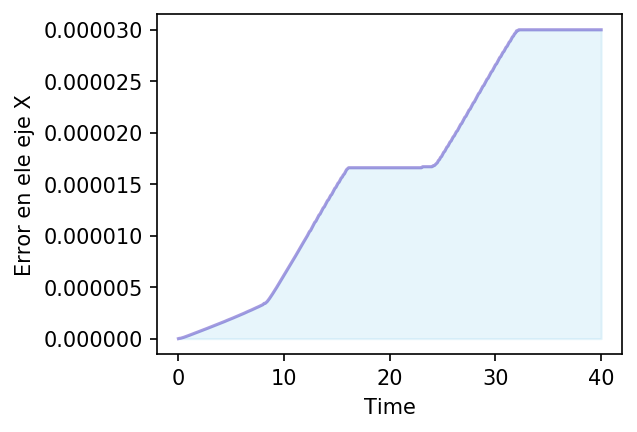

In [97]:
xISE = square_figure['ISExs'];
yISE = square_figure['ISEys'];

# Error en el eje x figura 1
plt.fill_between( time, xISE, color="skyblue", alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Error en ele eje X')
plt.plot(time, xISE, color="Slateblue", alpha=0.6)

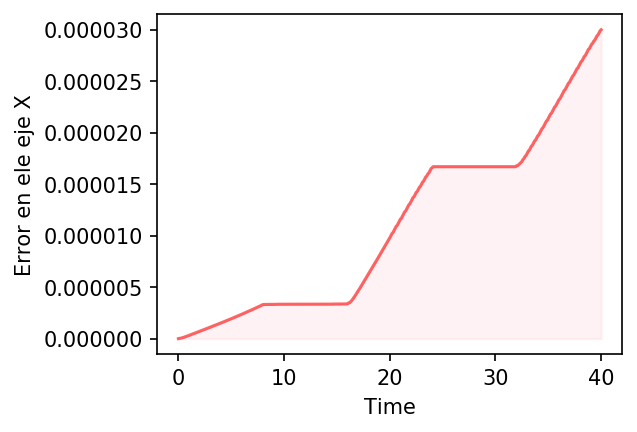

In [98]:
xISE = square_figure['ISExs'];
yISE = square_figure['ISEys'];

# Error en el eje y figura 1
plt.fill_between( time, yISE, color="pink", alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Error en ele eje X')
plt.plot(time, yISE, color="red", alpha=0.6)

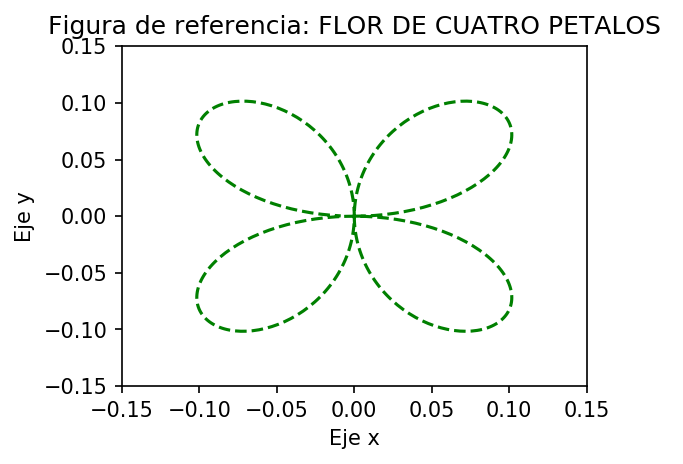

In [104]:
# Analisis de la figura 2

xr2 = flower_figure['Xrefc'];
yr2 = flower_figure['Yrefc'];

plt.plot(xr2, yr2, color='green', linestyle='--')
plt.title(' Figura de referencia: FLOR DE CUATRO PETALOS ')
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.show()


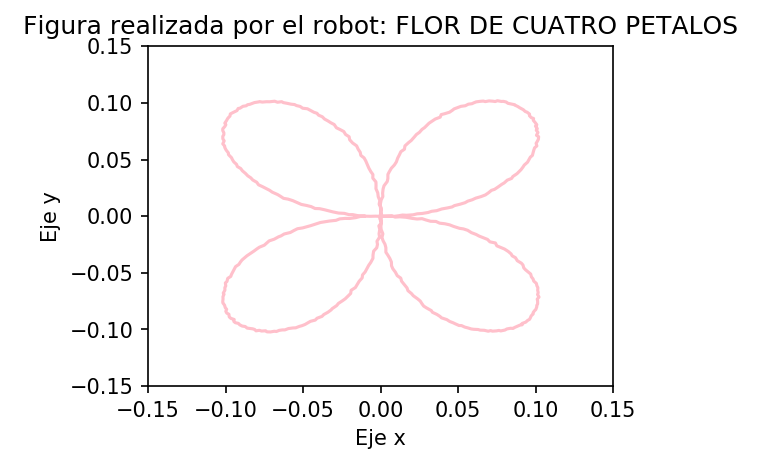

In [106]:
xrobot2 = flower_figure['Xrobotc'];
yrobot2 = flower_figure['Yrobotc'];

plt.plot(xrobot2, yrobot2, color='pink', linestyle='-')
plt.title(' Figura realizada por el robot: FLOR DE CUATRO PETALOS ')
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.show()

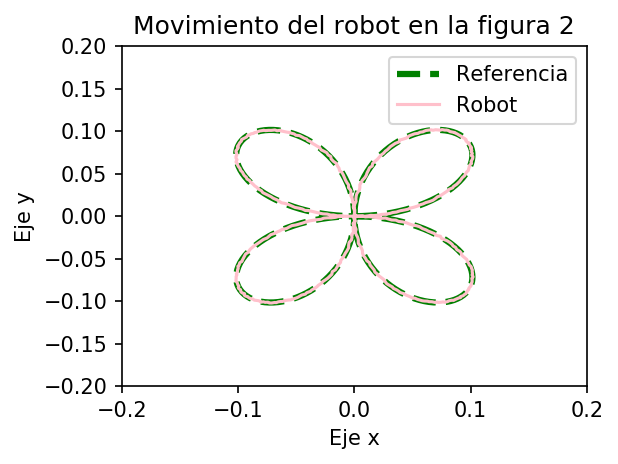

In [110]:
plt.plot(xr2, yr2, color='green', label='Referencia', linestyle='--', linewidth=3.0)
plt.plot(xrobot2, yrobot2, color='pink', label='Robot',linestyle='-')
plt.title('Movimiento del robot en la figura 2')
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.xlim(-0.20, 0.2)
plt.ylim(-0.2, 0.2)
plt.legend(["Referencia","Robot"])
plt.savefig('Figura2 Robot.png')
plt.show()

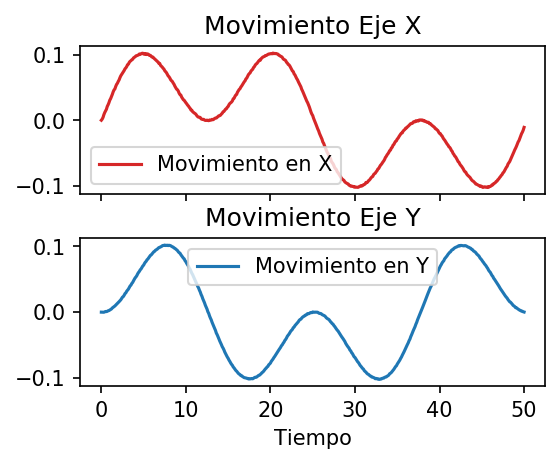

In [123]:
# Movimiento en el "eje x" y "eje y" en la flor de cuatro petalos

time = flower_figure['time'];
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.3})

axs[0].set_title('Movimiento Eje X')
axs[1].set_title('Movimiento Eje Y')
axs[0].plot(time, xrobot2, 'tab:red', label="Movimiento en X")
axs[1].plot(time, yrobot2, 'tab:blue', label="Movimiento en Y")
axs[0].legend(["Movimiento en X"])
axs[1].legend(["Movimiento en Y"])
plt.xlabel("Tiempo")
plt.savefig('Figura2 MovimientoXY.png')
plt.show()


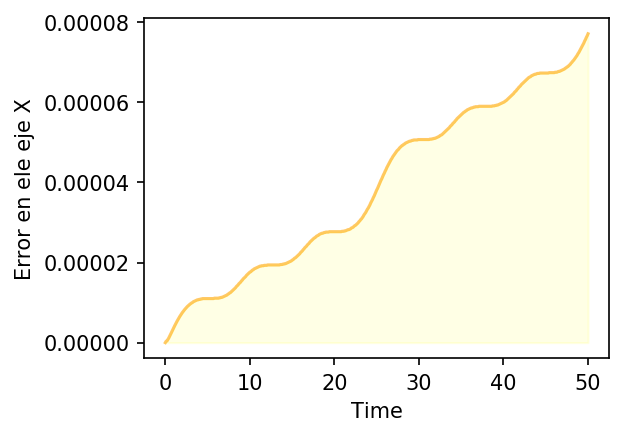

In [128]:
xISE = flower_figure['ISExc'];
yISE = flower_figure['ISEyc'];

# Error en el eje x figura 1
plt.fill_between( time, xISE, color="yellow", alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Error en ele eje X')
plt.plot(time, xISE, color="orange", alpha=0.6)

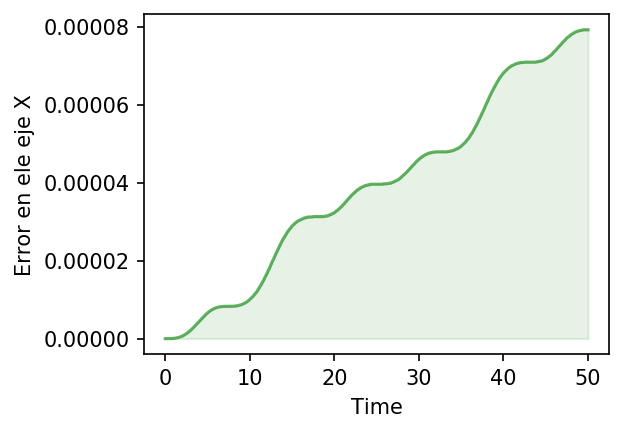

In [129]:
xISE = flower_figure['ISExc'];
yISE = flower_figure['ISEyc'];

# Error en el eje y figura 1
plt.fill_between( time, yISE, color="green", alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Error en el eje X')
plt.plot(time, yISE, color="green", alpha=0.6)

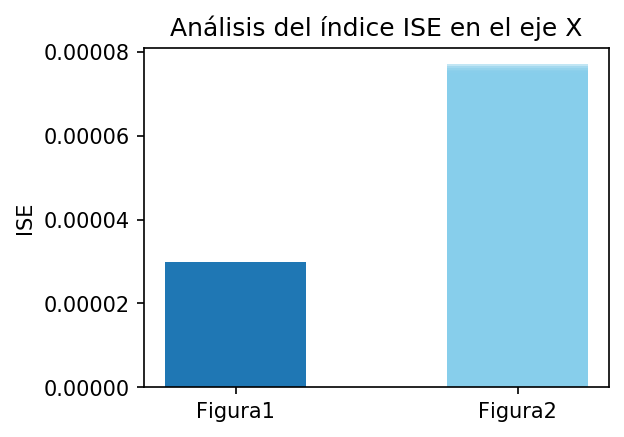

In [143]:
# Comparacion de los indices de rendimiento en el eje x

xISE1 = square_figure['ISExs'];

xISE2 = flower_figure['ISExc'];


# Group bar chart
index = np.arange(5)
width = 0.35
fig, ax = plt.subplots(figsize=(4, 3))
rects1 = ax.bar(["Figura1"], xISE1, 0.5,color='#1f77b4', alpha=0.5)
rects2 = ax.bar(["Figura2"], xISE2, 0.5,color='skyblue', alpha=0.5)

plt.ylabel('ISE')
plt.title('Análisis del índice ISE en el eje X')
plt.savefig('ISEx.png')
plt.show()



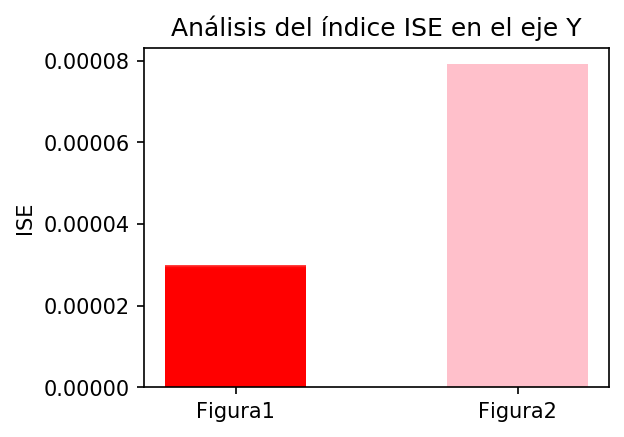

In [144]:
# Comparacion de los indices de rendimiento en el eje y

yISE1 = square_figure['ISEys'];
yISE2 = flower_figure['ISEyc'];


# Group bar chart
index = np.arange(5)
width = 0.35
fig, ax = plt.subplots(figsize=(4, 3))
rects1 = ax.bar(["Figura1"], yISE1, 0.5,color='red', alpha=0.5)
rects2 = ax.bar(["Figura2"], yISE2, 0.5,color='pink', alpha=0.5)

plt.ylabel('ISE')
plt.title('Análisis del índice ISE en el eje Y')
plt.savefig('ISEy.png')
plt.show()



# Conclusión

## Se analizó dos figuras realizadas por un robot accionado por cuatro cables. En este caso el robot dibujó un cuadrado que inicia desde el centro y una flor de cuatro pétalos

###### Figura 1: Cuadrado
<img src="Figura1 Robot.png" alt="drawing" style="width:500px;"/> 
###### Figura 2: Flor de cuatro pétalos
<img src="Figura2 Robot.png" alt="drawing" style="width:500px;"/>    

## Para observar el desempeño del robot en el movimiento para cada uno de los ejes se realizaron dos gráficas en un subplot 

###### Figura 3: Movimientos del robot en el tiempo. Cuadrado
<img src="Figura1 MovimientoXY.png" alt="drawing" style="width:400px;"/> 


###### Figura 4: Movimientos del robot en el tiempo. Flor de Cuatro Pétalos
<img src="Figura2 MovimientoXY.png" alt="drawing" style="width:400px;"/> 


## A través del análisis del indice de la integral del error cuadrático (ISE) se determinó que el robot en la Figura 1 (Cuadrado) tiene un mejor desempeño cuando el tiempo de ejecución avanza.
###### Figura 5: Diagrama de barras para el análisis del indice ISE en el eje X. 
<img src="ISEx.png" alt="drawing" style="width:400px;"/> 


###### Figura 6: Diagrama de barras para el análisis del indice ISE en el eje Y. 
<img src="ISEy.png" alt="drawing" style="width:400px;"/> 




###### Realizado por:  XAVIER IVAN AGUAS HARO
##### Fecha: 10/10/2020

